<a href="https://colab.research.google.com/github/lbznancio/data-science/blob/main/Detec%C3%A7%C3%A3o_de_fraudes_em_cart%C3%B5es_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: [Leibniz Venâncio](https://github.com/lbznancio)

[![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/leibniz-venâncio-3b7247178/)[![Medium](https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white)](https://medium.com/@leibnizvenancio)

# **Detecção de fraudes em cartões de crédito com Machine Learning**

Somente no ano passado, [uma pesquisa estimou que mais de oito milhões de brasileiros foram vítimas de golpes financeiros](https://agenciabrasil.ebc.com.br/radioagencia-nacional/economia/audio/2022-12/mais-de-8-milhoes-de-brasileiros-foram-vitimas-de-golpes-financeiros). Entre os casos mais comuns, a **clonagem de cartão de crédito** figura logo nas primeiras posições, o que tem preocupado instituições financeiras, sobretudo bancos e *fintechs*.  

<p align=center>
<img src="https://assets-global.website-files.com/6082ee0e95eb6459d78fac06/6349c530838cfa9865a71d90_How%20Scammers%20Steal%20Your%20Credit%20Card%20Numbers.png" width="60%"></p>


Não é à toa que as empresas do setor têm buscado investir pesadamente na área de Inteligência  Artifical (IA) para solucionar este problema. A Visa, por exemplo, [anunciou que, graças à IA, conseguiu evitar uma perda de quase US$ 25 bilhões em fraudes!](https://www.visa.com.br/sobre-a-visa/noticias-visa/nova-sala-de-imprensa/inteligencia-artificial.html)  


Devido à recorrência e importância desse tema, portanto, neste presente projeto, iremos construir e avaliar o desempenho de diferentes modelos de *Machine Learning* capazes de detectar transações fraudulentas em cartões de crédito. 

# **Obtenção dos Dados**

Os dados usados neste projeto foram disponibilizados por algumas empresas europeias de cartão de crédito. O *dataset* contém **290 mil** transações que ocorreram durante um período de dois dias, das quais apenas **492** foram classificadas como fraudes.

Outro detalhe importante é que as *features* do *dataset* são todas numéricas e, por motivos de privacidade e segurança, estão descaracterizadas (anônimas). Assim, os nomes das colunas aparecem como $[V1,V2,V3,\dots,V28]$.

<p align=center>
<img src="https://s.yimg.com/uu/api/res/1.2/zKqTVn4xuSGIYVCzfHfjMA--~B/Zmk9ZmlsbDtoPTU4Mzt3PTg3NTthcHBpZD15dGFjaHlvbg--/https://media-mbst-pub-ue1.s3.amazonaws.com/creatr-uploaded-images/2020-12/187e5720-45f1-11eb-b5f5-7ff2a4e534f8.cf.webp" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA). Esta transformação reduz a dimensionalidade do *dataset*, mantendo o maior número possível de informações. Para isso, o algoritmo encontra um conjunto novo de recursos, os chamados **componentes**. Estes são em número menor ou igual às variáveis originais. No projeto em questão, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3, \dots, V28]$.

Dito isso, iniciaremos nosso projeto importando os pacotes necessários e, em seguida, o próprio arquivo para uma estrutura `DataFrame`, utilizando a biblioteca `pandas`, a fim de manipulá-lo e explorá-lo melhor:

In [ ]:
# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [ ]:
# importando os pacotes 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

# importando scikit-learn para criar o modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# link de acesso direto ao csv
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importando o arquivo para um DataFrame (df)
df = pd.read_csv(file_path)

# **Análise Exploratória dos Dados (AED)**

O objetivo desta etapa é alcançar um entendimento geral de como os dados estão estruturados.

**Dicionário das variáveis**

* `Time` - segundos decorridos desde a primeira transação;

* `Amount` - valor da transação;


* `Class` - variável alvo, na qual: 
    * **0:** indica transação normal ou regular;
    * **1:** transação fraudulenta.

## **Dimensões do *dataset* e tipos de dados**

Começaremos examinando as dimensões do `DataFrame`, bem como as suas primeiras entradas:

In [ ]:
# dimensões do df
print("Número de colunas (variáveis):\t{}\nNúmero de linhas (entradas):\t{}".format(df.shape[1], df.shape[0]))

Número de colunas (variáveis):	31
Número de linhas (entradas):	284807


In [ ]:
# cinco primeiras entradas do df
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Pelo resultado acima, temos uma noção mais clara daquilo que falamos no começo, isto é, de que, com exceção de `Time` e `Amount`, as demais *features* foram descaracterizadas por meio da [transformação PCA](http://www2.ic.uff.br/~aconci/PCA-ACP.pdf).

## **Resumo Estatístico dos dados**


Podemos agora esboçar um resumo estatístico do `DataFrame` por meio do método `describe()`, cuja função é calcular estatísticas descritivas dos dados (média, desvio padrão, máximo e mínimo, etc.): 


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Pelo que podemos observar acima, $[V1,V2,V3,\dots,V28]$, bem como a coluna `Time`, não possuem nenhuma discrepância aparente.

Quanto à variável `Amount`, vemos que a média de transações financeiras neste conjunto de dados é baixa (cerca de € 88,35), com um valor máximo de € 25.691, 16. 

## **Valores ausentes**

O nosso próximo passo é verificar se há **valores ausentes** no *dataset*: 

In [ ]:
# quantidade de valores ausentes por variável (em termos de porcentagem)
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

Ou seja, nenhuma variável apresenta valores ausentes. Sigamos com a verificação dos dados em termos de **balanceamento**.

## **Verificando o balanceamento** 

O balanceamento de dados é um dos passos importantes para garantir a qualidade do modelo.  Dizemos que um *dataset* está balanceado quando cada classe tem um número semelhante de exemplos.

Apenas para melhor ilustrar esse ponto, imagine um problema de classificação binária no qual a classe positiva (1) representa 40% do *dataset*, ao passo que a classe negativa (0) representa 60%. Neste caso, dizemos que os dados não estão balanceados.

O perigo do desbalanceamento são os *problemas de viés*, isto é, quando o modelo tende a ser mais preciso para a classe com maior número de exemplos (classe majoritária).

Entendido isso, voltemos à verificação do balanceamento: 

* Lembrando que, para a varíavel `Class`, o algarismo **0** indica transação normal, enquanto que **1**, transação fraudulenta. 

In [ ]:
# ver o balanceamento da varíavel 'class'
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Como havia alertado no começo,   cerca de 284 mil transações foram identificadas como normais, ao passo que apenas 492 como fraudulentas (o que corresponde a 0,17% do total).

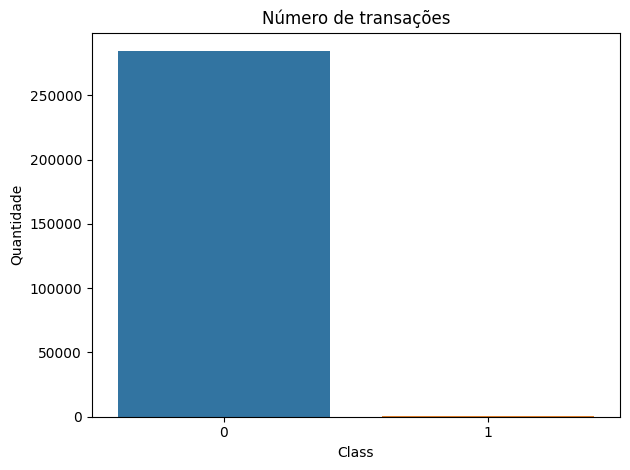

In [ ]:
# em termos de gráfico
fig, ax = plt.subplots()

sns.countplot(x='Class', data=df)
ax.set_title('Número de transações');
ax.set_ylabel('Quantidade')

plt.tight_layout()

Desnecessário dizer, portanto, que os dados estão altamente **desbalanceados**. Para então evitarmos problemas de viés, deveremos balancear este *dataset*, o que será feito mais adiante.

Vamos continuar nossa AED observando o comportamento das transações ao longo do tempo: 

## **Transações ao longo do tempo**

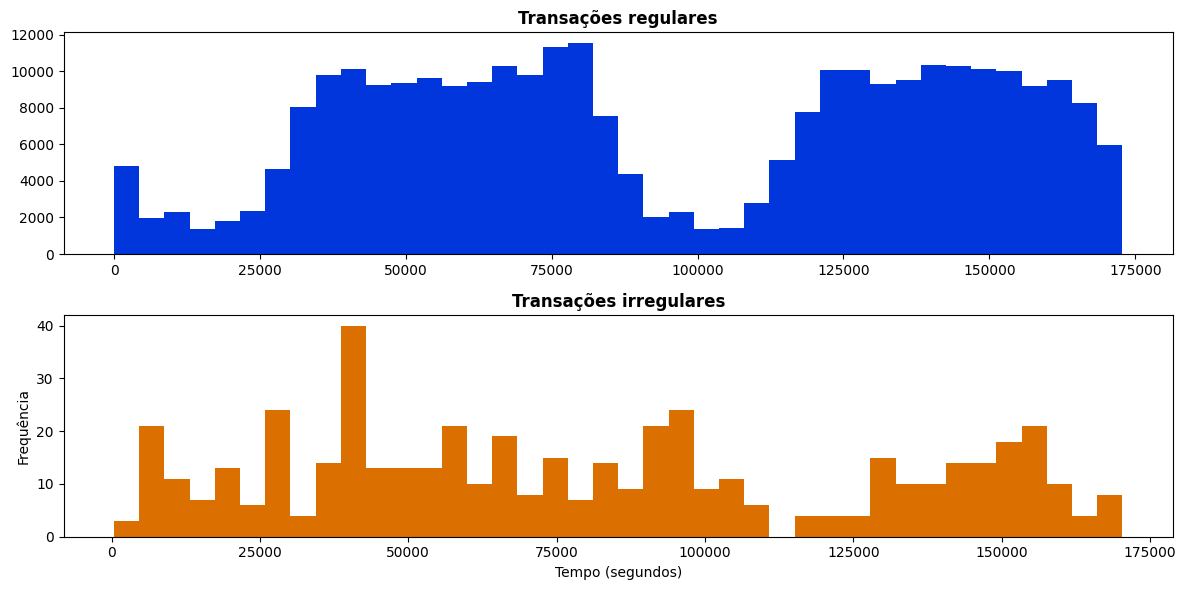

In [ ]:
# histograma das transações ao longo do tempo
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

ax1.hist(df.Time[df.Class == 0], bins=40, color='#0036DB')
ax1.set_title('Transações regulares',  fontweight="bold")



ax2.hist(df.Time[df.Class == 1], bins=40, color='#DB6F00')
ax2.set_title('Transações irregulares', fontweight="bold")
ax2.set_ylabel('Frequência')
ax2.set_xlabel('Tempo (segundos)')

plt.tight_layout()

Note que, ao contrário das *irregulares*, as *transações regulares* de maior frequência ocorreram em intervalos de tempo específicos.

Façamos o mesmo para a variável `Amount`(valor por transação):

## **Frequência dos valores por transação**

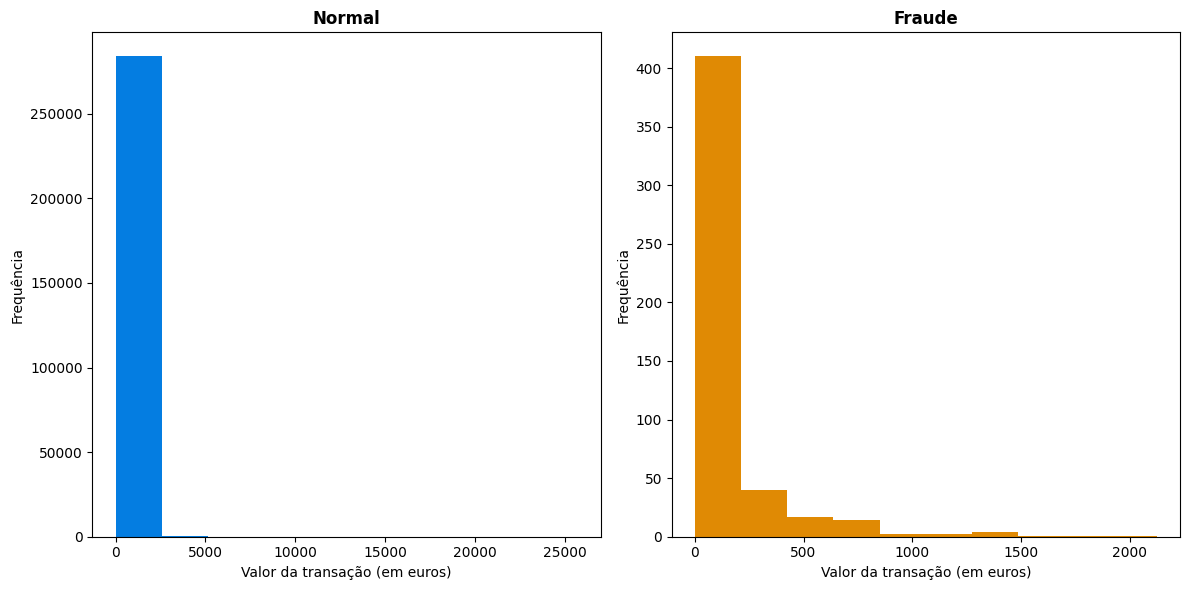

In [ ]:
# histograma da frequência dos valores por transação
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(df.Amount[df.Class == 0], bins=10, color='#047DE1');
ax1.set_xlabel('Valor da transação (em euros)')
ax1.set_ylabel('Frequência')
ax1.set_title('Normal', fontweight='bold')

ax2.hist(df.Amount[df.Class == 1], bins=10, color='#E08A04');
ax2.set_xlabel('Valor da transação (em euros)')
ax2.set_ylabel('Frequência')
ax2.set_title('Fraude', fontweight='bold')

fig.tight_layout()

Pelos resultados acima, observamos que as transações fraudulentas, em vista das normais, tiveram valores mais baixos (repare que o *eixo-x* é inferior a 2.500 euros), muito provavelmente pelo fato dos criminosos não quererem levantar maiores suspeitas.

## **Gráfico de Densidade**

Seguindo nossa análise, construiremos os *gráficos de densidade*, uma ferramenta muito útil para compararmos as distribuições das variáveis em cada classe, facilitando a identificação das mais importantes para detecção de anomalias (no caso, as próprias fraudes):

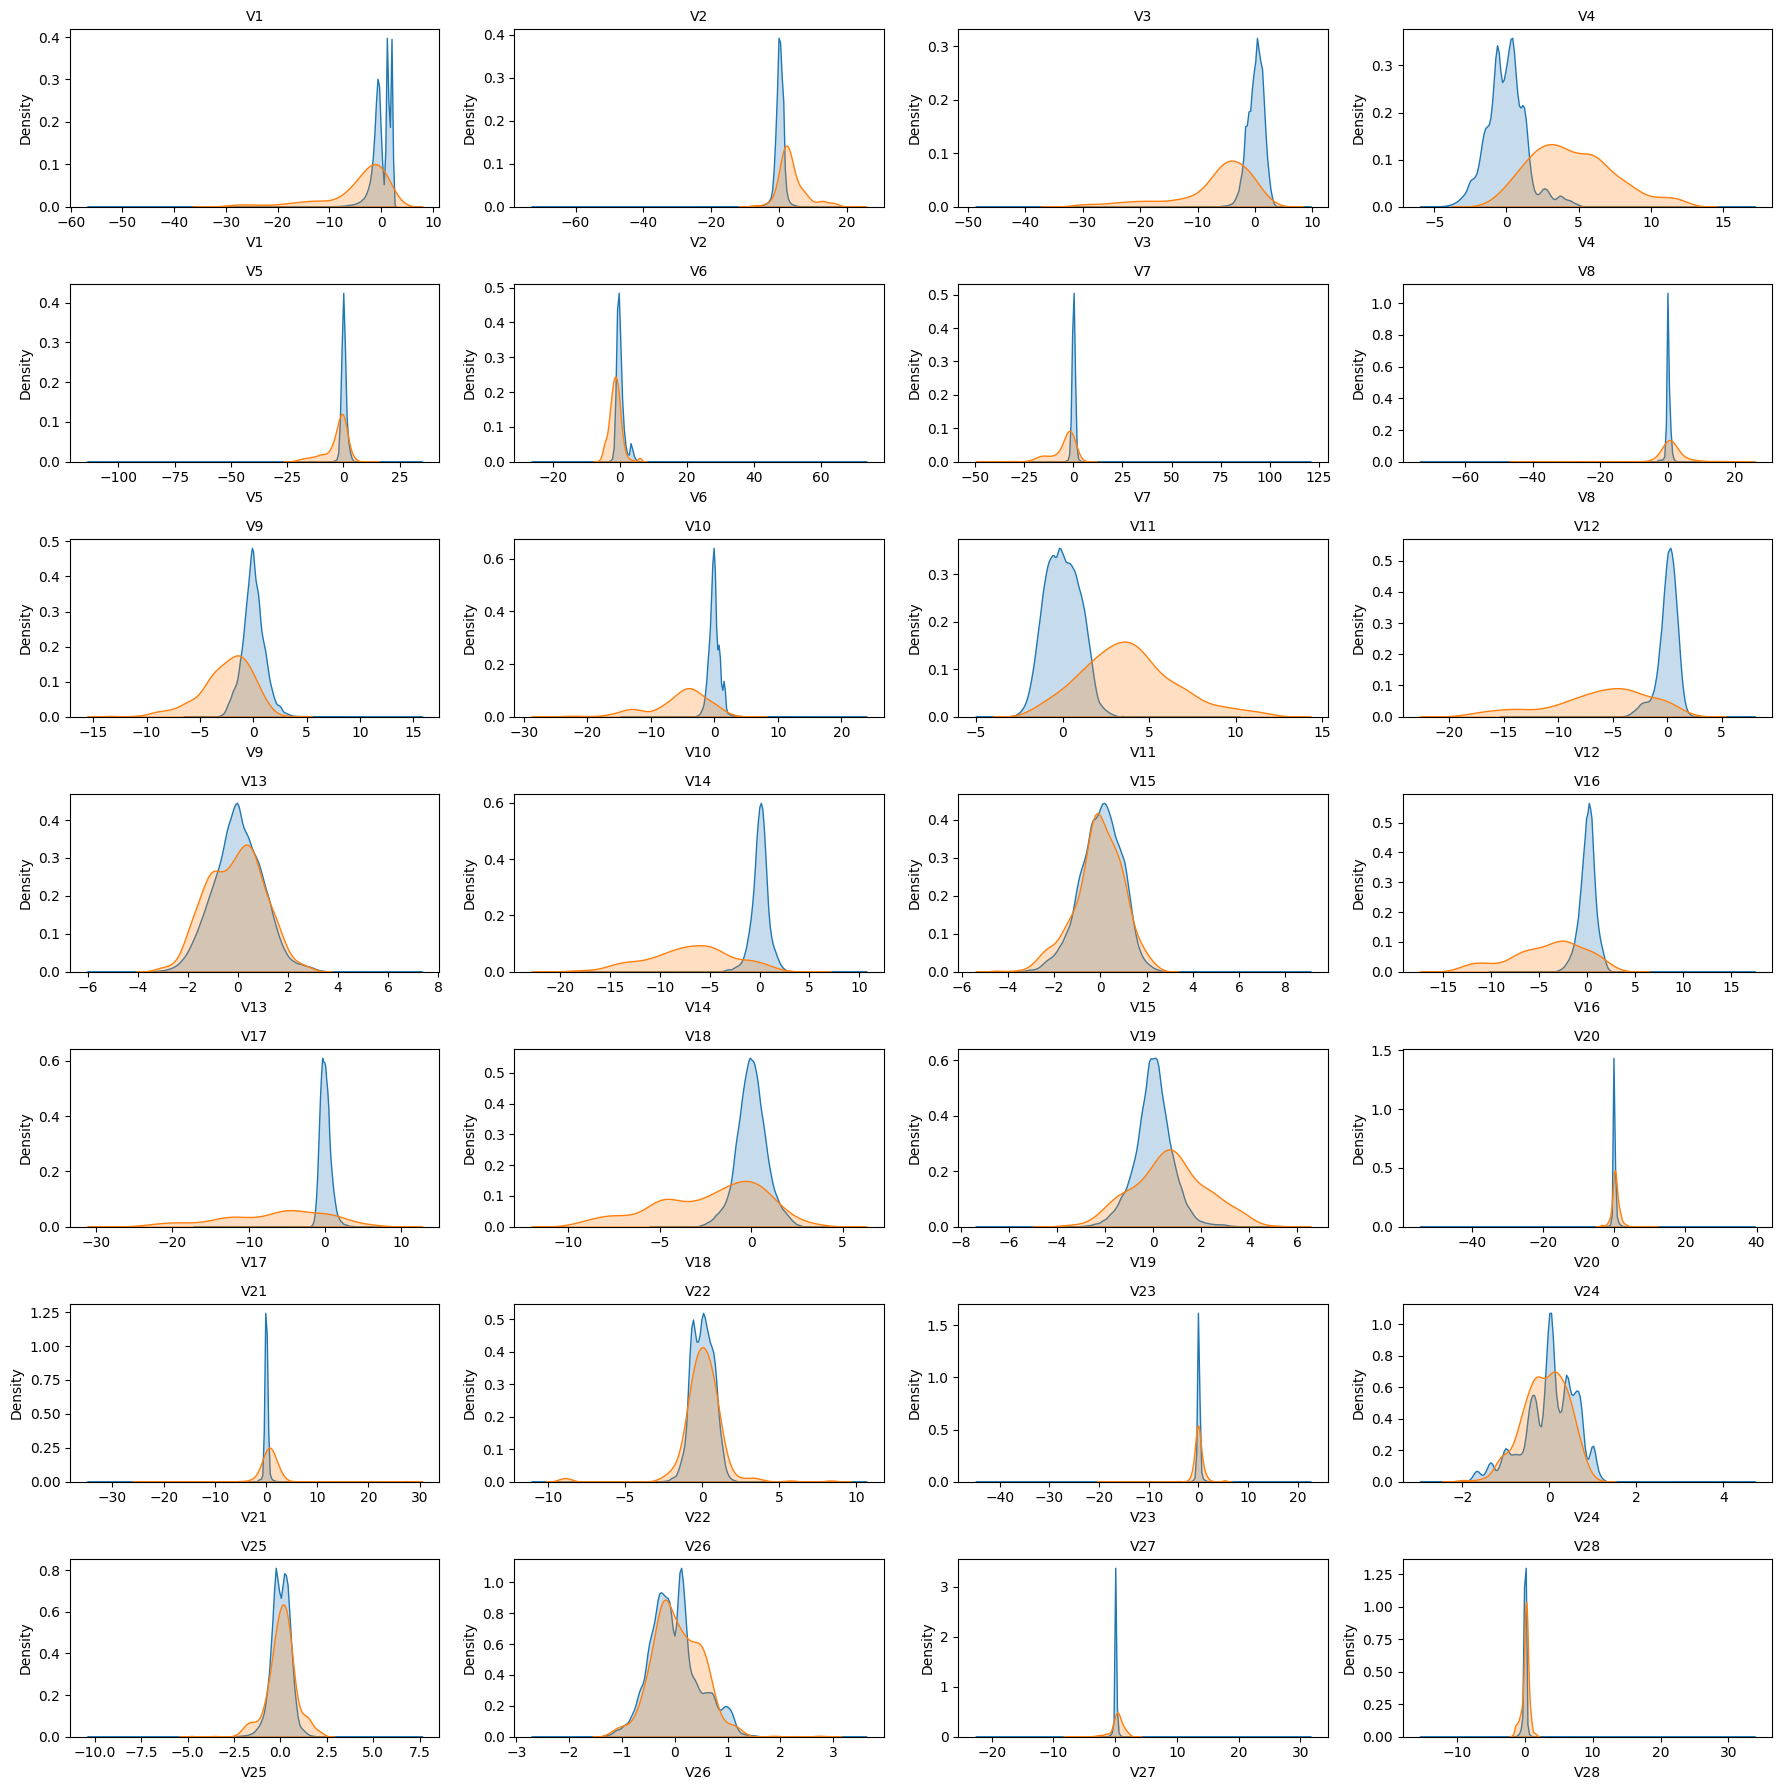

In [ ]:
# criando os gráficos de densidade
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(7, 4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)

plt.tight_layout();

Note, por exemplo, como as variáveis `V3`, `V4`, `V10` e `V11` são bem distintas (o que será importante para o treinamento do modelo), enquanto que `V13` e `V15` são mais similares. 

## **Em suma**

Algumas conclusões principais que chegamos até o momento:

*   O *dataset* está altamente desbalanceado;
* Não há valores ausentes ou nulos no conjunto;
* Em face das irregulares, as transações regulares distribuem-se em intervalos de tempo específicos e com valores maiores;
* Por fim, as colunas `Time` e `Amount` não estão padronizadas.

# **Preparação dos Dados**

Nesta próxima etapa do projeto, iremos: 


1.   Padronizar `Time` e `Amount`;
2.   Dividir o *dataset* em treino e teste; 
3.   Balancear o conjunto de dados, a fim de evitar uma baixa performance para a classe 1 e *overfitting*.



## **Padronização de `Time` e `Amount`**

Embora nem sempre seja necessária, a padronização consiste em colocar os dados em uma mesma escala — no caso, em uma *distribuição Gaussiana* (média zero e desvio padrão igual a um). Por meio dessa técnica, a comparação e análise dos dados é facilitada, melhorando o desempenho do algoritmo de *machine learning*.  

Em nosso caso em concreto, como visto anteriormente, `Time` e `Amount` possuem diferentes magnitudes e variações, o que pode gerar problemas de viés no modelo. Portanto, precisaremos padronizá-las.

Para isso, recorreremos à biblioteca do `scikit-learn` (já importada no começo), em especial ao método `StandardScaler()`:

In [ ]:
# fazendo uma cópia do df
df_clean = df.copy()

# padronizando as colunas Time e Amount
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

Vamos conferir o resumo estatístico do  `df` limpo: 

In [ ]:
df_clean.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727,2.913952e-17,-3.065637e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00,1.000002e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01,-1.996583e+00
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01,-8.552120e-01
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01,-2.131453e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02,9.372174e-01
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02,1.642058e+00


Repare que, de fato, tanto a coluna `std_amount` quanto `std_time` agora estão na mesma escala, com `mean` zero e `std` igual a um, aproximadamente. 

## **Conjuntos de treino e teste**

Nosso próximo passo consiste em separar o *dataset* em dois conjuntos: 
1. Conjunto de **treino**, usado para treinar o modelo, isto é, para ajustar os seus parâmetros, a fim de encontrar a melhor maneira de relacionar as variáveis independentes `X` com a variável dependente `y`;
2. Conjunto de **teste**, usado para avaliar o desempenho do modelo, ou seja, a capacidade do modelo de generalizar para novos dados e verificar se o modelo está sofrendo de *over* ou *underfitting*. 

Importante ressaltar que `X`representa uma matriz de recursos (*feature matrix*), contendo as variáveis ​​independentes usadas para prever a variável dependente `y` (*target vector*).  O objetivo do modelo de *Machine Learning* é aprender a relação entre `X` e `y`, de modo que, quando receber novos valores de `X`, possa prever com precisão o valor correspondente de `y`.

Em nosso caso, `X` será todas as colunas do *dataset*, com exceção de `Class`, pois esta será precisamente o `y`.  Adotaremos a proporção de 85/15 para os conjuntos de treino e teste, respectivamente.

In [ ]:
# separando as variáveis X e y
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.15, stratify=y, shuffle=True)

## **Balanceamento dos dados**

Como vimos ainda na etapa de Análise Exploratória, este *dataset* está altamente desbalanceado, o que é um problema. 

Existem diversas maneiras de se fazer o balanceamento. Uma abordagem recorrente é a *sampling approach*, cujo objetivo é diminuir as diferenças entre as classes por meio da reamostragem, usando alguma das seguintes técnicas: 


*   **Oversampling**: aumenta a proporção da classe minoritária, gerando novas amostras sintéticas; 
*   **Undersampling**: reduz a proporção da classe majoritária, removendo aleatoriamente suas amostras.

No caso, optaremos pela *undersampling*. Para implementá-la, usaremos a biblioteca `imblearn`:



In [ ]:
# aplicando a técnica de undersampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# verificando balanceamento das classes
print(pd.Series(y_rus).value_counts())

# comparando as dimensões (antes e depois)
print("\nDimensões de y_train antes do balanceamento:", y_train.shape)
print("Dimensões de y_train depois do balanceamento:", y_rus.shape)

print("\nDimensões de X_train antes do balanceamento:", X_train.shape)
print("Dimensões de X_train depois do balanceamento:", X_rus.shape)

0    418
1    418
Name: Class, dtype: int64

Dimensões de y_train antes do balanceamento: (242085,)
Dimensões de y_train depois do balanceamento: (836,)

Dimensões de X_train antes do balanceamento: (242085, 30)
Dimensões de X_train depois do balanceamento: (836, 30)


Veja que já não há mais aquela discrepância inicial. O balanceamento reduziu as dimensões tanto de `X_train` quanto de `y_train`, passando de 242 mil entradas para 836, de tal modo que agora as duas classes possuem o mesmo peso. 

## **Matriz de correlação**

Com os dados balanceados, podemos plotar uma matriz de correlação e identificar quais variáveis estão mais fortemente relacionadas uma com as outras:

Text(0.5, 1.0, 'Dados balanceados')

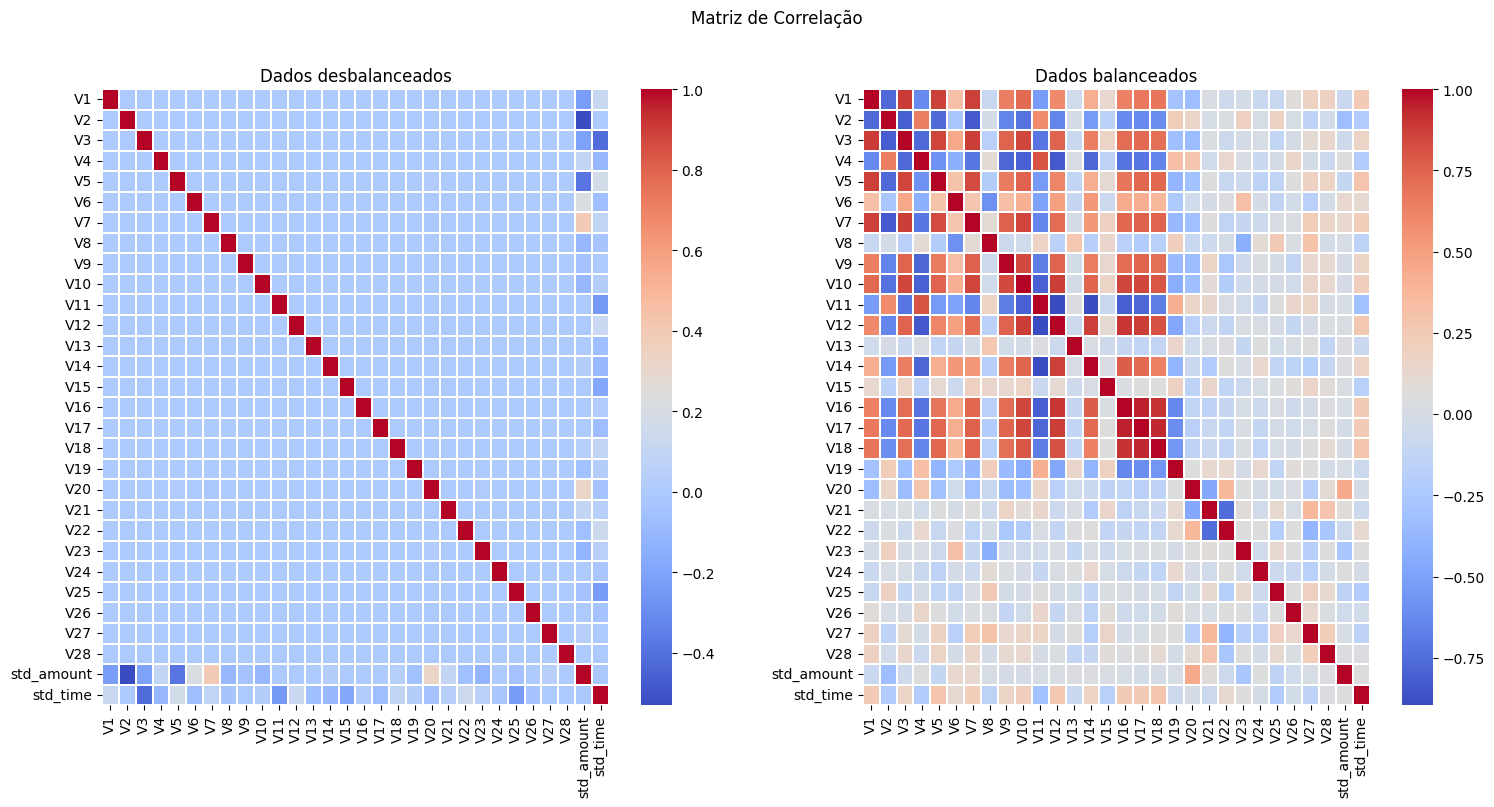

In [ ]:
# plotando a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax1)
ax1.set_title('Dados desbalanceados')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax2)
ax2.set_title('Dados balanceados')

Facilmente observamos que, antes do balanceamento, a matriz de correlação não trazia nenhuma informação relevante, o que já é bem diferente do gráfico à direita. 

# **Modelos de Machine Learning**

Após uma análise exploratória completa, e com todos os dados preparados, finalmente podemos testar alguns modelos de ML em nosso *dataset*. 

Como estamos diante de um problema de classificação binária (fraude ou não-fraude), testaremos os seguintes modelos: 

1. **Regressão Logística** (*Logistic Regression*);
2. **Árvore de Decisão** (*Decision Tree*); 
3. **Random Forests**.


## **Regressão Logística**

A regressão logística é um modelo estatístico utilizado para análise de dados em que a variável dependente é categórica (binária ou multiclasse). O seu objetivo é estimar a probabilidade de um evento ocorrer com base em um conjunto de variáveis independentes.

Usa-se a regressão logística, por exemplo, em problemas de detecção de fraudes em cartão de crédito (nosso caso), diagnóstico médico e detecção de *spam*.

Dito isso, vamos começar:

In [ ]:
# instanciando e treinando o modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazendo as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

Agora que o modelo já está treinado e com as previsões feitas, é chegado o momento de avaliarmos o seu desempenho em prever transações fraudulentas. Para isso, utilizaremos a **Matriz de Confusão**, o **Relatório de Classificação** e a métrica **AUC ROC** (área sob a curva ROC): 

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9652    0.9822     42648
           1     0.0450    0.9459    0.0859        74

    accuracy                         0.9651     42722
   macro avg     0.5224    0.9556    0.5341     42722
weighted avg     0.9982    0.9651    0.9807     42722



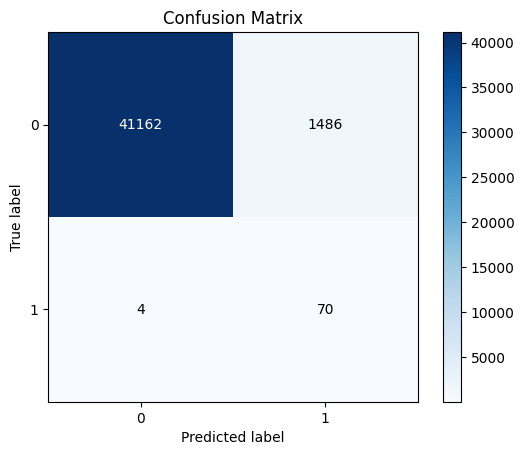

In [ ]:
# plotando a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred);

# imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

In [ ]:
# área sob da curva (AUC)
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

AUC: 0.9556



### **Conclusão**

Pelo resultado da Matriz acima, podemos concluir que: 

*   Das 42.648 transações regulares, 41.162 foram previstas corretamente (*recall* de 96,52%). As demais (1.486) foram classificadas incorretamente como fraudes; 
*  O mesmo raciocínio aplica-se às transações irregulares, isto é, das 74 identificadas, 70 foram classificadas corretamente (*recall* de 94,59%), enquanto que o restante delas, erroneamente como normais. 

Já pelo Relatório de Classificação, além dos *recalls* já mencionados, vemos que a precisão global do modelo (`accuracy`) foi de 96,51%, o que significa que, de todas as previsões feitas, 96,51% estavam corretas! 

Por fim, a métrica da AUC foi de 95, 56%, o que é excelente. Isso indica que o modelo é capaz  de fazer previsões precisas na maioria dos casos.

*Mas será que os demais modelos não são capazes de fazer melhores previsões?* Vamos testá-los. 

## **Árvore de Decisão**

[*Decision Tree*](https://scikit-learn.org/stable/modules/tree.html#decision-trees) é um algoritmo de aprendizagem supervisionada usado tanto para classificação quanto para regressão. O modelo é uma estrutura em forma de árvore, construído a partir de um processo de indução, que vai dividindo os dados em subconjuntos cada vez mais puros. Para selecionar os atributos que irão compor a árvore, são considerados o grau de entropia de um nó e a informação ganha a mais após um *split*.

Uma das maneiras de se evitar o *overfitting* com este modelo é definir adequadamente a profundidade máxima da árvore (`max_depth`), ou seja, o número máximo de níveis que a árvore pode ter. Para isso, testaremos um intervalo de 3 a 10 para o `max_depth `, escolhendo para o modelo final aquele que apresentar o melhor desempenho. 

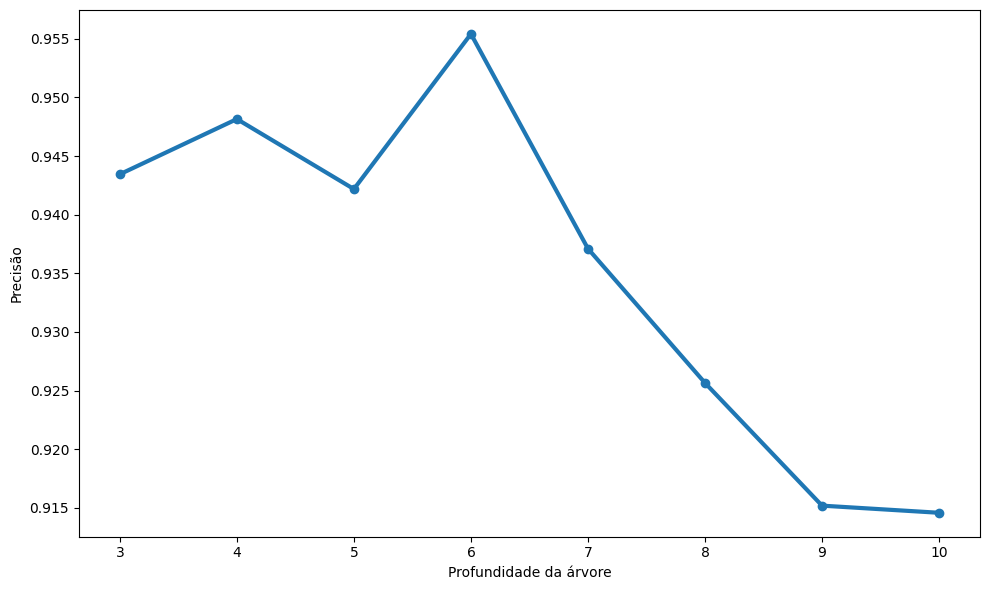

A melhor precisão foi 0.9554, com max_depth igual a 6.


In [ ]:
n = 11
dep = np.zeros((n-3))

for i in range(3, n):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    tree.fit(X_rus, y_rus)
    y_pred_tree = tree.predict(X_test)

    dep[i-3] = accuracy_score(y_test, y_pred_tree)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range(3, n), dep, linewidth=3, marker='o')
ax.set_ylabel('Precisão')
ax.set_xlabel('Profundidade da árvore')
ax.grid(False)

plt.tight_layout()
plt.show()

best_depth = dep.argmax()+3
print(f'A melhor precisão foi {round(dep.max(), 4)}, com max_depth igual a {best_depth}.') 

Relatório de Classificação
               precision    recall  f1-score   support

           0     0.9999    0.9574    0.9782     42648
           1     0.0366    0.9324    0.0705        74

    accuracy                         0.9574     42722
   macro avg     0.5183    0.9449    0.5243     42722
weighted avg     0.9982    0.9574    0.9766     42722

AUC: 0.9449



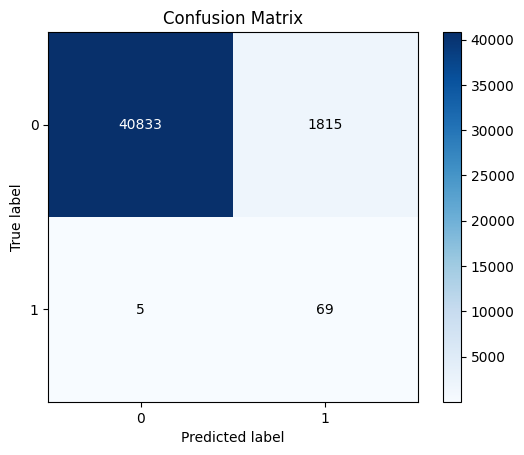

In [ ]:
# instanciando e treinando o modelo
model = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
model.fit(X_rus, y_rus)

# fazendo as previsões
y_pred = model.predict(X_test)

# plotando a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

# relatório de classificação
print('Relatório de Classificação\n', classification_report(y_test, y_pred, digits=4))

# área sob da curva (AUC)
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))

Antes chegarmos às conclusões, olhemos para a *Decision Tree* gerada: 

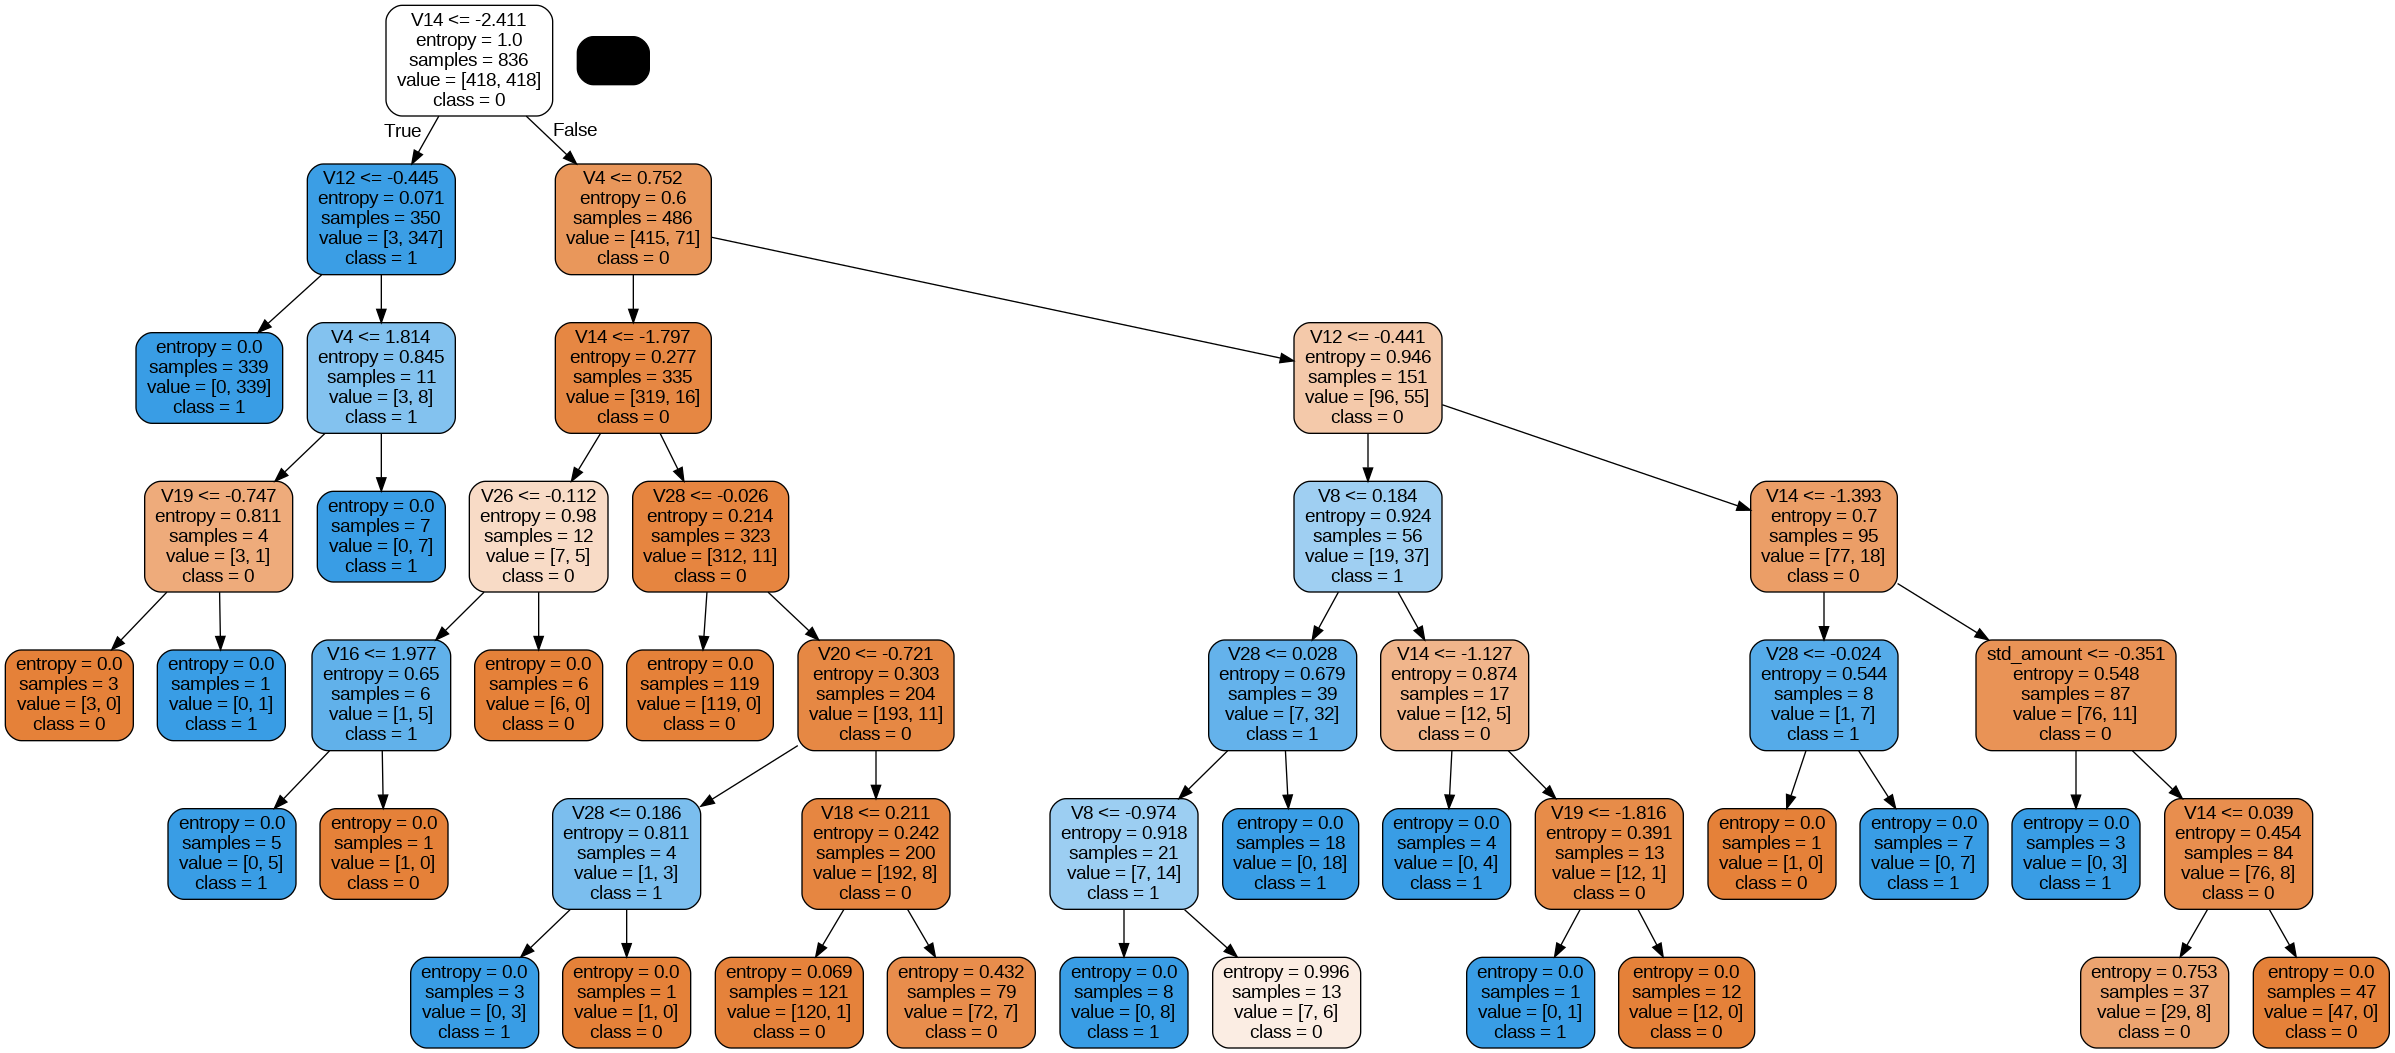

In [ ]:
# importando as bibliotecas
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# criando os dots 
dot = export_graphviz(model, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plotando a árvore
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

### **Conclusão**

*  Pela Matriz de Confusão, vê-se que das 42.648 transações regulares, 40.833 foram classificadas corretamente (*recall* de 95,74%), enquanto que, em relação às transações fraudulentas, 69 de 74 foram previstas acertadamente (*recall* de 93,24%); 
*   A acurácia global foi de 95, 74%, e a AUC resultou em 94,49%.

Comparando estes resultados com os do modelo de Regressão que acabamos de testar, podemos concluir que este performou melhor. 

Por fim, veremos como o *Random Forests* se sai dentre eles. 





## **Random Forests**

Outro poderoso e versátil algoritimo de aprendizagem supervisionada é o [*Random Forests*](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Ele utiliza uma coleção de árvores de decisão aleatórias (daí o *forest*), combinando as previsões de todas as árvores individuais para se chegar a uma previsão final. No caso de problemas de classificação, a previsão final é a classe que recebeu a maioria dos votos das árvores individuais.

Classification Report
               precision    recall  f1-score   support

           0     0.9999    0.9790    0.9893     42648
           1     0.0706    0.9189    0.1311        74

    accuracy                         0.9789     42722
   macro avg     0.5352    0.9490    0.5602     42722
weighted avg     0.9982    0.9789    0.9878     42722

AUC: 0.9490



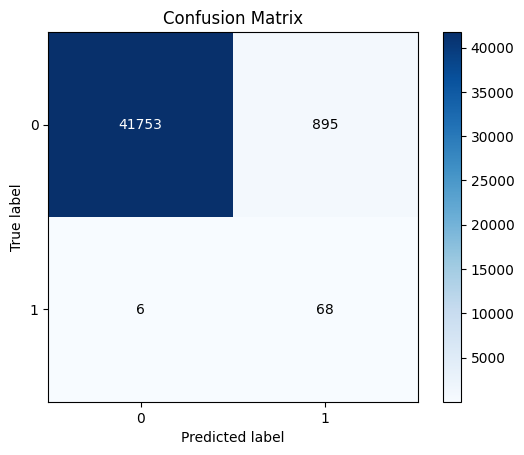

In [ ]:
# instanciando e treinando o modelo
model = RandomForestClassifier(n_estimators=200,random_state=0)
model.fit(X_rus, y_rus)

# fazendo as previsões
y_pred = model.predict(X_test)

# plotando a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

# plotando o relatório de classificação
print('Relatório de Classificação\n', classification_report(y_test, y_pred, digits=4))

# área sob a curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))

### **Conclusão**

Já podemos ver que os resultados melhoraram consideravelmente, pelo menos em relação ao modelo anterior:


*   Entre as transações normais, 41.753 foram previstas corretamente (*recall* de 97,90%). Já entre as fraudulentas, 68 foram classificadas com acerto (*recall* de 91,89%);
*  A acurácia global foi de 97, 89%, e a AUC resultou em 94,90%.



## **Qual dos três modelos?**

Já percebemos que o *Decision Tree* ficou para trás em relação aos dois modelos. A disputa é entre o *Random* e o de Regressão. 

Bom, ainda que o *Random Forests* obteve um *recall* elevado para as transações normais, além de uma acurácia global impressionante, a sua capacidade de detectar transações irregulares — que é o principal objetivo deste projeto —, bem como a AUC, foram menores do que as do modelo de Regressão Logística. Neste, essas métricas ficaram em 94,59% e 95,56%, respectivamente.  

Assim, podemos afirmar que o modelo de Regressão foi o que teve o melhor desempenho! 

# **Considerações finais**

A detecção de fraudes em cartão de crédito não é um problema trivial. Mesmo com um *dataset* livre de valores ausentes e variáveis categóricas, tivemos que, entre outras coisas, padronizar os dados e aplicar-lhes técnicas de balanceamento.

Ademais, vimos que a escolha de um modelo também não é algo simples. Além de toda a etapa de preparação dos dados, é necessário realizar testes e comparar os resultados com os diferentes algoritmos. Em nosso caso, dentre os três modelos de classificação avaliados, o de *Logistic Regression* foi aquele que melhor conseguiu detectar as transações fraudulentas.